In [269]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [270]:
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names = columns)

In [271]:
df.shape

(150, 5)

In [272]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [273]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [274]:
df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

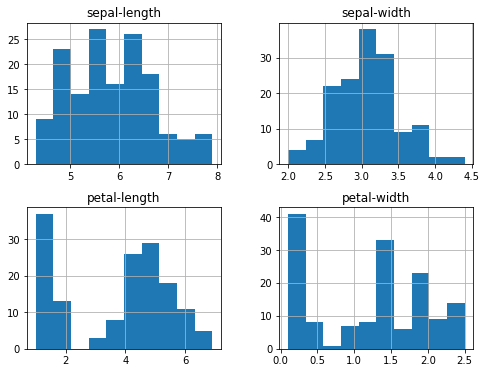

In [293]:
df.hist(figsize = (8,6))
plt.show()

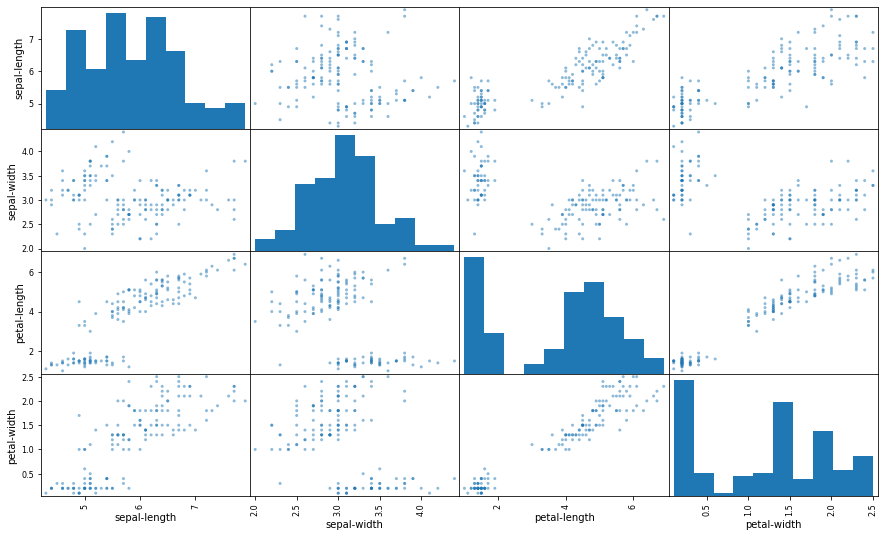

In [296]:
scatter_matrix(df, figsize = (15,9))
plt.show()

In [277]:
#The seeds are for the random_state of the train_test_split and kfolds.  The random state of the data from the application of these functions
#is saved to a seed.  10 separate random states are used to compare model performances across different random splits.

values = np.array(df.values)
X = values[:, 0:4]
y = values[:, 4]
test_size = .3
seeds = list(range(1,11))

In [278]:
#Create a list of the models

models = []
models.append(('LR', LogisticRegression(max_iter = 10000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))

In [279]:
#Creates the random states for each seed, trains and tests the different models for each random state, and collects the results

all_results = []

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)
    kf = KFold(n_splits = 10, random_state = seed, shuffle = True)
    results = []
    names = []
    
    for name, model in models:
        cv_results = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'accuracy')
        results.append(cv_results)
        names.append(name)
    
    all_results.append(results)

In [280]:
#Organize the results into separate lists for each model

lr_results = []
lda_results = []
knn_results = []
dt_results = []
gnb_results = []
svm_results = []

master_results = [lr_results, lda_results, knn_results, dt_results, gnb_results, svm_results]

for results in all_results:
    for idx, result in enumerate(results):
        if idx == 0:
            lr_results.append(result)
        if idx == 1:
            lda_results.append(result)
        if idx == 2:
            knn_results.append(result)
        if idx == 3:
            dt_results.append(result)
        if idx == 4:
            gnb_results.append(result)
        if idx == 5:
            svm_results.append(result)

In [281]:
#Collapses the results for each model into a single array so summary statistics can be performed

for idx, results in enumerate(master_results):
    results = np.stack(results)
    mean = results.mean()
    std = results.std()
    name = names[idx]
    msg = "{}: {} ({})"
    print(msg.format(name, round(mean, ndigits = 4), round(std, ndigits = 4)))

LR: 0.963 (0.0598)
LDA: 0.9751 (0.0458)
KNN: 0.9619 (0.0558)
DT: 0.9478 (0.0666)
GNB: 0.9516 (0.0593)
SVM: 0.9581 (0.0614)


In [283]:
#Creates an array of the results suitable for plotting into a box and whisker plot

plot_results = np.array([])
for idx, results in enumerate(master_results):
    results = np.stack(results)
    plot_results = np.append(plot_results, results)
plot_results = np.split(plot_results, 6)

In [284]:
#Creates a dataframe of the results suitable for descriptive statistics

df_results = pd.DataFrame()

for idx, col in enumerate(plot_results):
    df_results[idx] = col

df_results.columns = names

In [285]:
df_results.describe()

,LR,LDA,KNN,DT,GNB,SVM
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.963000,0.975091,0.961909,0.947818,0.951636,0.958091
std,0.060098,0.046077,0.056095,0.066899,0.059618,0.061751
min,0.727273,0.818182,0.800000,0.700000,0.800000,0.700000
25%,0.909091,1.000000,0.909091,0.906818,0.909091,0.909091
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


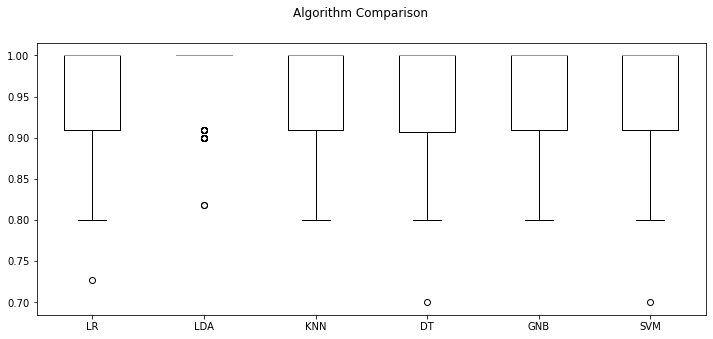

In [286]:
fig = plt.figure(figsize = (12,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(plot_results)
ax.set_xticklabels(names)
plt.show()

In [287]:
#Based on the descriptive statistics and the box and whisker plot of the results, the best model is LDA
#Prints accuracy scores for the LDA model for each random state

print('Accuracy Scores')
for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)
    kf = KFold(n_splits = 10, random_state = seed, shuffle = True)
    lda.fit(X_train, y_train)
    predictions = lda.predict(X_test)
    print(accuracy_score(y_test, predictions))

Accuracy Scores
1.0
1.0
0.9777777777777777
0.9555555555555556
0.9555555555555556
0.9333333333333333
0.9777777777777777
0.9777777777777777
1.0
1.0


In [288]:
#Prints the confusion matrix for the LDA model for each random state

print('Confusion Matrices')
for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)
    kf = KFold(n_splits = 10, random_state = seed, shuffle = True)
    lda.fit(X_train, y_train)
    predictions = lda.predict(X_test)
    print(confusion_matrix(y_test, predictions))
    print('\n')

Confusion Matrices
[[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]


[[17  0  0]
 [ 0 15  0]
 [ 0  0 13]]


[[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]


[[21  0  0]
 [ 0  9  1]
 [ 0  1 13]]


[[15  0  0]
 [ 0 15  1]
 [ 0  1 13]]


[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


[[12  0  0]
 [ 0 15  1]
 [ 0  0 17]]


[[15  0  0]
 [ 0 15  1]
 [ 0  0 14]]


[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]


[[14  0  0]
 [ 0 17  0]
 [ 0  0 14]]




In [289]:
#Prints the classification report for the LDA model for each random state

print('Classification Reports')
for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)
    kf = KFold(n_splits = 10, random_state = seed, shuffle = True)
    lda.fit(X_train, y_train)
    predictions = lda.predict(X_test)
    print(classification_report(y_test, predictions))

Classification Reports
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.93      0.96        14
 